In [ ]:
#@title Librerias
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
from scipy.optimize import fsolve
from scipy.optimize import fsolve, bisect, newton, root_scalar, fixed_point

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

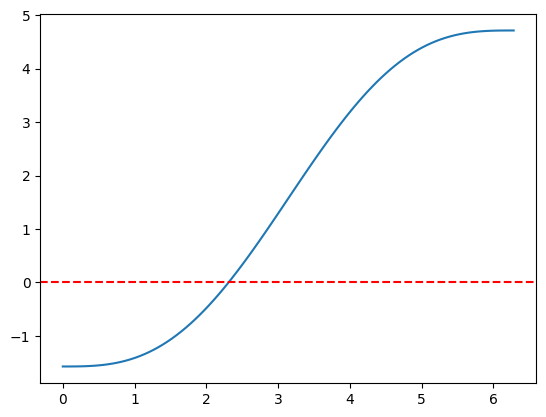

In [ ]:
# Aqui va su código
f = lambda x: x - np.sin(x) - np.pi/2
np.linspace(0,np.pi,100)
plt.plot(np.linspace(0,2*np.pi,100),f(np.linspace(0,2*np.pi,100)))
plt.axhline(0, color='red', linestyle='--', label="y = pi/2")
plt.show()

In [ ]:
f = lambda x: x - np.sin(x) - np.pi/2
x1 = bisect(f, 0, 2*np.pi)
x2 = newton(f, 1)
x3 = root_scalar(f, x0=1)
print(x1, x2, x3.root)

2.3098814600101703 2.3098814600100575 2.309881460010057


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


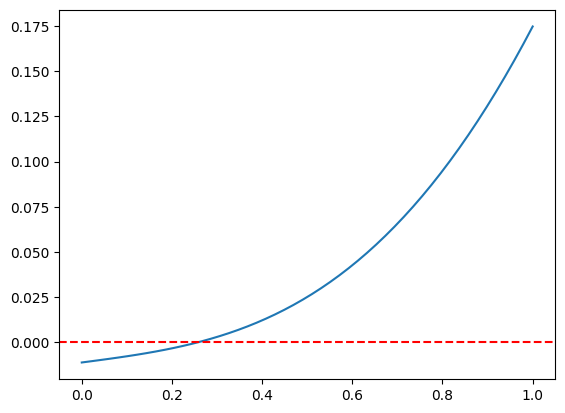

0.2586348761437123 0.2586348761437363


In [ ]:
# Aqui va su código
#t(1 de abril) = 1986.24725274725, 1986 +(90/364)
m = 2*np.pi*(1986.24725274725 - 1986.1113)/75.96000
e = 0.9672671
f = lambda x: x - e*np.sin(x) - m
plt.plot(np.linspace(0,1),f(np.linspace(0,1)))
plt.axhline(0, color='red', linestyle='--', label="y = pi/2")
plt.show()
x1 = newton(f, 0.5)
x2 = root_scalar(f, x0=1, method = 'secant')
print(x1, x2.root)

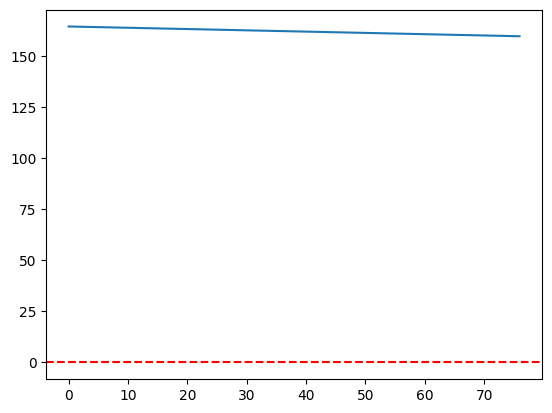

In [ ]:

e = 0.9672671
E = 0.2586348761437123
f = lambda t: E - e*np.sin(E) - 2*np.pi*(t*75.96/100 - 1986.1113)/75.96000
plt.plot(np.linspace(0,75.96,100),f(np.linspace(0,75.96,100)))
plt.axhline(0, color='red', linestyle='--', label="y = pi/2")
plt.show()

6.271939700228663


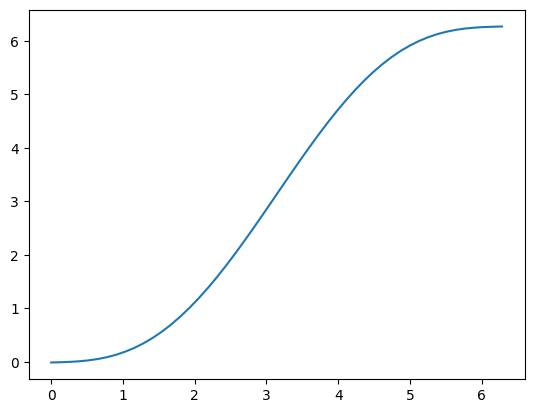

In [ ]:
m = 2*np.pi*(1986.24725274725 - 1986.1113)/75.96000
e = 0.9672671
f = lambda x: x - e*np.sin(x) - m
print(f(2*np.pi))
plt.plot(np.linspace(0,2*np.pi),f(np.linspace(0,2*np.pi)))
plt.show()

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [ ]:
# Aqui va su código
T = 0.5 # Temperatura

m = sym.symbols('m')
f_sym = m - sym.tanh(m/T)
df_sym = sym.diff(f_sym, m)
f = sym.lambdify(m, f_sym)
df = sym.lambdify(m, df_sym)
newt = newton(f, 1,fprime= df)
secante = newton(f, 1)
print(newt, secante)



0.9575040240772688 0.9575040240772764


In [ ]:
T = 0.5
m = sym.symbols('m')
f_sym = sym.tanh(m/T)
f = sym.lambdify(m, f_sym)
pf = float(fixed_point(f,1))
print(round(pf,4)) #Validando con punto fijo

0.9575


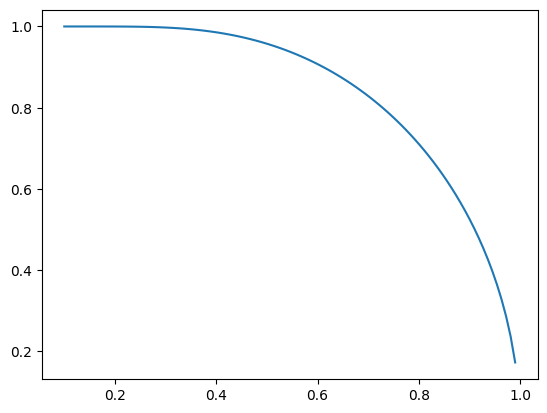

In [ ]:
T = np.linspace(0.1,0.99,100)
m = sym.symbols('m')
l = []
for i in T:
  f_sym = m - sym.tanh(m/i)
  f = sym.lambdify(m, f_sym)
  mag = newton(f, 1)
  l.append(mag)
plt.plot(T,l)
plt.show()
